In [1]:
import yfinance as yf

In [2]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

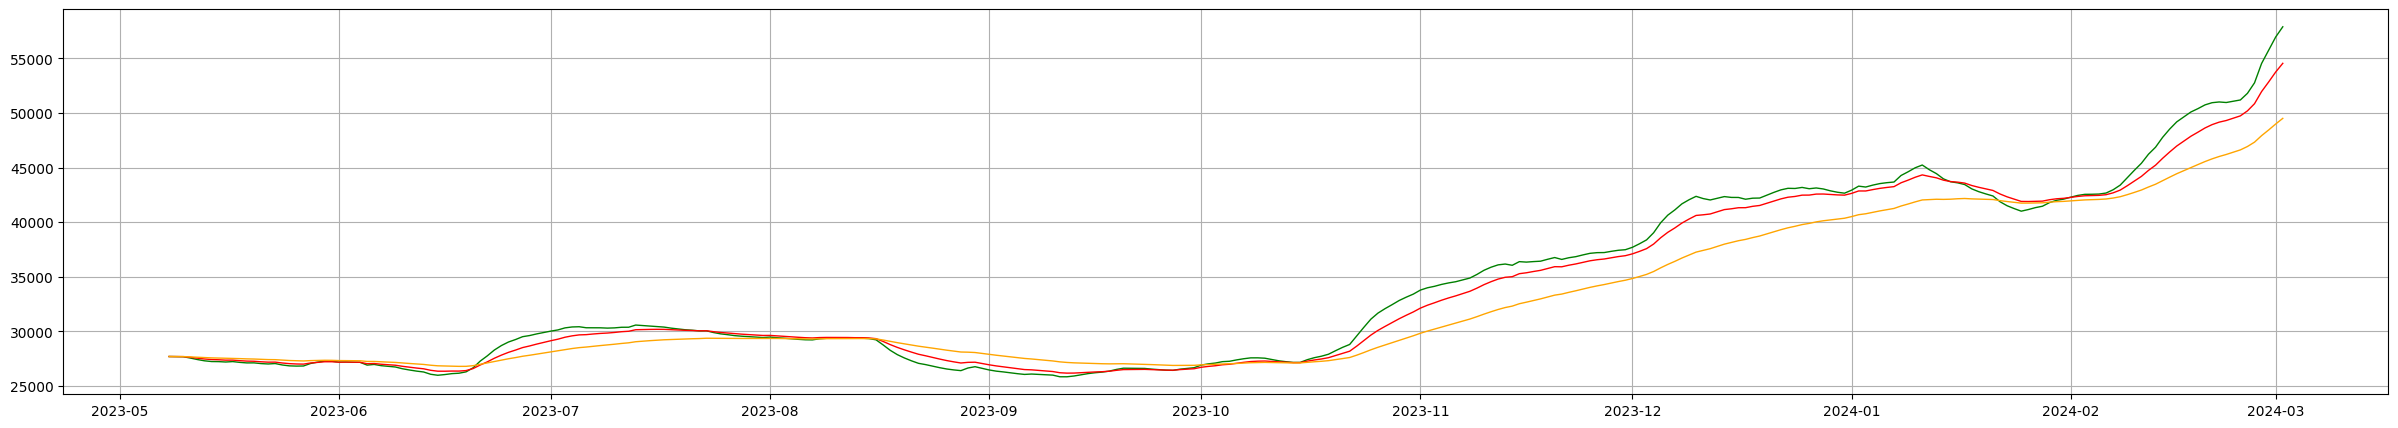

In [4]:
from algo_trader.lib.indicators.threeEma import ThreeEMA

df = data.iloc[-300:]
ema = ThreeEMA(10, 20, 50)
ema.calculate(df)
ema.plot()

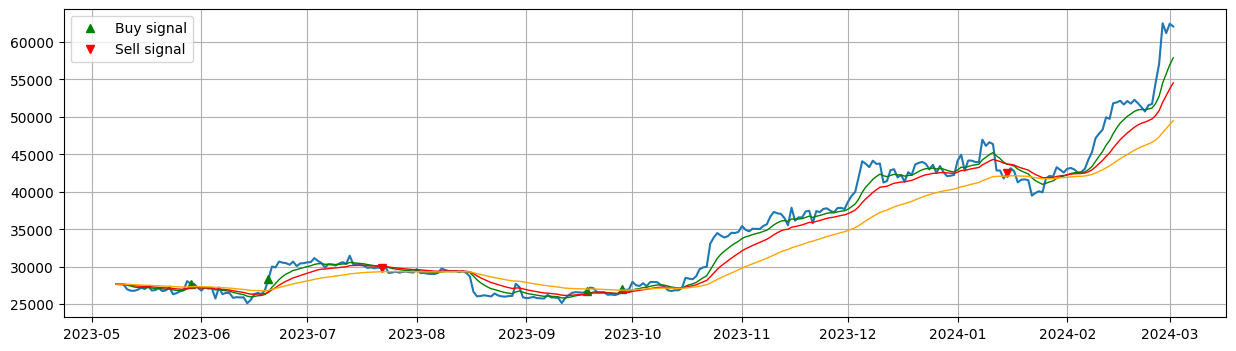

In [5]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,4), nrows=1, gridspec_kw={'height_ratios' : [1]})

ema_df = ema.calculate(df)
ema_df['buy_signal'] = ema.calc_buy_signals()
ema_df['sell_signal'] = ema.calc_sell_signals()
buySignals = ema_df[ema_df['buy_signal'] == 1]
sellSignals = ema_df[ema_df['sell_signal'] == -1]

ax.plot(ema_df.index, ema_df.Close)
ax.plot(buySignals.index, buySignals.Close, '^', label='Buy signal', color='green')
ax.plot(sellSignals.index, sellSignals.Close, 'v', label='Sell signal', color='red')
ax.legend(loc='upper left')
ax.plot(ema_df.index, ema_df.FAST_EMA, color='green', linewidth=1)
ax.plot(ema_df.index, ema_df.SLOW_EMA, color='red', linewidth=1)
ax.plot(ema_df.index, ema_df.SUPPORT_EMA, color='orange', linewidth=1)
ax.grid()

In [6]:
new_record = data.iloc[-1:]
ema.predict_signal(new_record)

[Three EMA] Current fast EMA value: 58652.36411849638
[Three EMA] Current slow EMA value: 55262.08350055902
[Three EMA] Current support EMA value: 49996.34325767382
[Three EMA] Signal: Action.HOLD


<Action.HOLD: 'hold'>